1. Part 3 - Edge Detection: Sobel Edge Detector to Original Image Rice

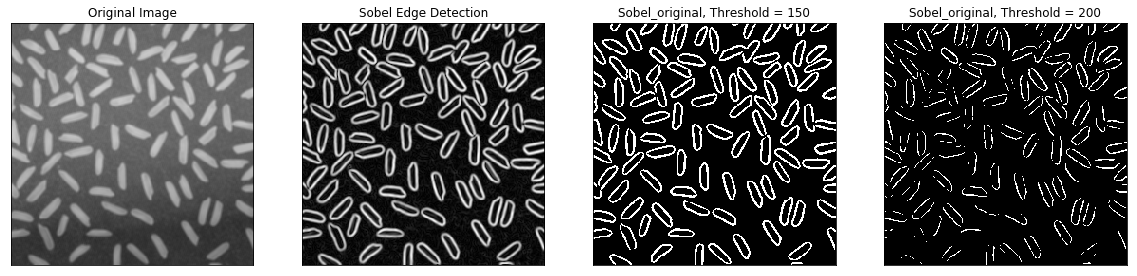

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Apply a Sobel edge detector to the image 'rice'. Use
#following thresholds: 150 and 200. Use kernel size of 3.

# load the image as grayscale
img_path = "./rice.png"
img_rice = cv2.imread(img_path)
img_rice_gray = cv2.cvtColor(img_rice, cv2.COLOR_BGR2GRAY)

# apply 3x3 Sobel filters to the intensity channel
sobel_rice_x = cv2.Sobel(img_rice_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_rice_y = cv2.Sobel(img_rice_gray, cv2.CV_64F, 0, 1, ksize=3)

#compute the gradient magnitude of the sobel-filtered image
sobel_rice = cv2.magnitude(sobel_rice_x,sobel_rice_y)

# set the threshold
Threshold1 = 150
Threshold2 = 200

ret, thresh1 = cv2.threshold(sobel_rice, Threshold1, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(sobel_rice, Threshold2, 255, cv2.THRESH_BINARY)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(141), plt.imshow(img_rice, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(sobel_rice, cmap="gray")
plt.title("Sobel Edge Detection"), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(thresh1, cmap="gray")
plt.title("Sobel_original, Threshold = 150"), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(thresh2, cmap="gray")
plt.title("Sobel_original, Threshold = 200"), plt.xticks([]), plt.yticks([])
plt.show()

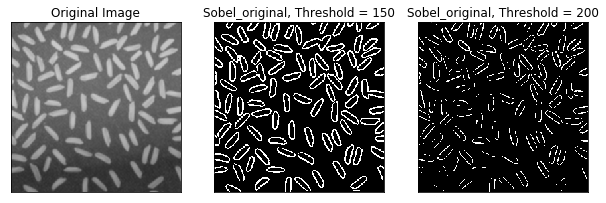

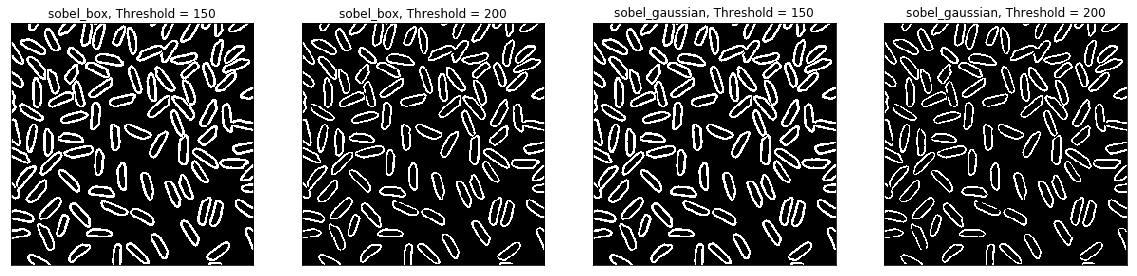

In [7]:
#Apply a Sobel edge detector to the two previously-sharpened images
#with the same threshold.

img_path = "./rice.png"
img_rice = cv2.imread(img_path)
img_rice_gray = cv2.cvtColor(img_rice, cv2.COLOR_BGR2GRAY)

#generate the blurred images for offset calculation
img_box = cv2.blur(img_rice,(5,5))
img_gaussian = cv2.GaussianBlur(img_rice,(5,5), np.sqrt(2))

#details = original image - blurred image
#sharpened image = original image + details

#Calculate the sharpened image using box filtered image
detail_box = img_rice - img_box
sharpened_box = img_rice + detail_box

#Calculate the sharpened image using gaussian filtered image
detail_gaussian = img_rice - img_gaussian
sharpened_gaussian = img_rice + detail_gaussian

#Convert image to gray-scale
img_gray_box = cv2.cvtColor(sharpened_box, cv2.COLOR_BGR2GRAY)
img_gray_gaussian = cv2.cvtColor(sharpened_gaussian, cv2.COLOR_BGR2GRAY)

#Apply Sobel Edge Detector to the sharpened images
sobel_box_x = cv2.Sobel(img_gray_box, cv2.CV_64F, 1, 0, ksize=3)
sobel_box_y = cv2.Sobel(img_gray_box, cv2.CV_64F, 0, 1, ksize=3)
sobel_box = np.sqrt(np.power(sobel_box_x,2)+np.power(sobel_box_y,2))

sobel_gaussian_x = cv2.Sobel(img_gray_gaussian, cv2.CV_64F,1,0,ksize=3)
sobel_gaussian_y = cv2.Sobel(img_gray_gaussian, cv2.CV_64F,0,1,ksize=3)
sobel_gaussian = np.sqrt(np.power(sobel_gaussian_x,2)+np.power(sobel_gaussian_y,2))

#Apply Sobel Edge Detector to original image just to show the comparison
sobel_original_x = cv2.Sobel(img_rice_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_original_y = cv2.Sobel(img_rice_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_original = np.sqrt(np.power(sobel_original_x,2)+np.power(sobel_original_y,2))

#Apply thresholds
ret, thresh3 = cv2.threshold(sobel_box, Threshold1, 255, cv2.THRESH_BINARY)
ret, thresh4 = cv2.threshold(sobel_box, Threshold2, 255, cv2.THRESH_BINARY)
ret, thresh5 = cv2.threshold(sobel_gaussian, Threshold1, 255, cv2.THRESH_BINARY)
ret, thresh6 = cv2.threshold(sobel_gaussian, Threshold2, 255, cv2.THRESH_BINARY)
ret, thresh7 = cv2.threshold(sobel_original, Threshold1, 255, cv2.THRESH_BINARY)
ret, thresh8 = cv2.threshold(sobel_original, Threshold2, 255, cv2.THRESH_BINARY)

#display images
plt.figure(figsize=(14, 14))
plt.subplot(141), plt.imshow(img_rice, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(thresh7, cmap="gray")
plt.title("Sobel_original, Threshold = 150"), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(thresh8, cmap="gray")
plt.title("Sobel_original, Threshold = 200"), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(20, 20))
plt.subplot(141), plt.imshow(thresh3, cmap="gray")
plt.title("sobel_box, Threshold = 150"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(thresh4, cmap="gray")
plt.title("sobel_box, Threshold = 200"), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(thresh5, cmap="gray")
plt.title("sobel_gaussian, Threshold = 150"), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(thresh6, cmap="gray")
plt.title("sobel_gaussian, Threshold = 200"), plt.xticks([]), plt.yticks([])
plt.show()

Comment on the effectiveness of using sharpening prior to the edge
detection:

By using sharpening prior to edge detection, we could obtain better results since sharpening emphasizes the edges, giving them more contrast and making them easier to be detected. The contrast between edge detection using original image and sharpened images can be observed from the above figures. The edges are much clearer for the sharpened images.

2. Part 3 - Sobel Edge Detector: Effect of Denoising on Edge Detection

max of img_woman 795.0308170127747


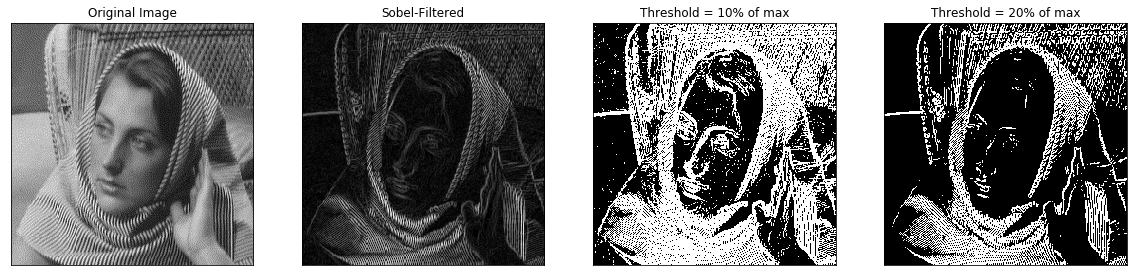

max_woman_box: 323.8302024209601


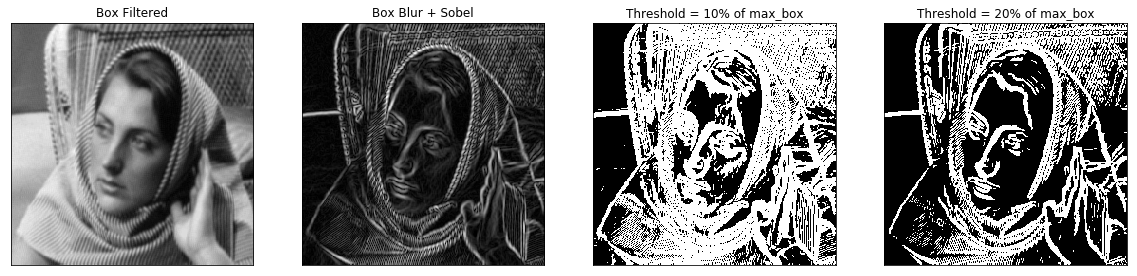

In [4]:

# Apply a Sobel edge detector to the image 'woman' (see Figure 2(b)).
# Use two values of thresholds: 10% and 20% of the maximum filter
# response.

# load the image 
img_path = "./woman.png"
img_woman = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)

#Generate filtered image of "woman"
sobel_woman_x = cv2.Sobel(img_woman, cv2.CV_64F, 1, 0, ksize=3)
sobel_woman_y = cv2.Sobel(img_woman, cv2.CV_64F, 0, 1, ksize=3)
sobel_woman = cv2.magnitude(sobel_woman_x,sobel_woman_y)


#Find maximum value of the image "woman"
max_woman = np.amax(sobel_woman)
print("max of img_woman",max_woman)

#Define the thresholds
threshold1 = 0.1*max_woman
threshold2 = 0.2*max_woman

#Generate threshold images
ret, thresh1 = cv2.threshold(sobel_woman, threshold1, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(sobel_woman, threshold2, 255, cv2.THRESH_BINARY)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(141), plt.imshow(img_woman, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(sobel_woman, cmap="gray")
plt.title("Sobel-Filtered"), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(thresh1, cmap="gray")
plt.title("Threshold = 10% of max"), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(thresh2, cmap="gray")
plt.title("Threshold = 20% of max"), plt.xticks([]), plt.yticks([])
plt.show()


# First denoise image with a 3 x 3 box filter and then apply a Sobel
# edge detector. Use the same values of threshold.
img_woman_box = cv2.blur(img_woman,(3,3))
sobel_woman_box_x = cv2.Sobel(img_woman_box,cv2.CV_64F,1,0,ksize=3)
sobel_woman_box_y = cv2.Sobel(img_woman_box,cv2.CV_64F,0,1,ksize=3)
sobel_woman_box = cv2.magnitude(sobel_woman_box_x,sobel_woman_box_y)


#Determine maxima of the sobel-filtered image
max_woman_box = np.amax(sobel_woman_box)
threshold3 = 0.1*max_woman_box
threshold4 = 0.2*max_woman_box
print("max_woman_box:", max_woman_box)

ret, thresh3 = cv2.threshold(sobel_woman_box,threshold3, 255, cv2.THRESH_BINARY)
ret, thresh4 = cv2.threshold(sobel_woman_box,threshold4, 255, cv2.THRESH_BINARY)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(141), plt.imshow(img_woman_box, cmap="gray")
plt.title("Box Filtered"), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(sobel_woman_box, cmap="gray")
plt.title("Box Blur + Sobel"), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(thresh3, cmap="gray")
plt.title("Threshold = 10% of max_box"), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(thresh4, cmap="gray")
plt.title("Threshold = 20% of max_box"), plt.xticks([]), plt.yticks([])
plt.show()


Comment on the effectiveness of using denoising prior to edge detection:

Applying denoising technique prior to edge detection gives much better results and the edges can be seen more clearly since most of the noise is removed. Moreover, the surfaces of the object are also smoother.

